In [1]:
import numpy as np
import pandas as pd 
import re
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, NMF
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from string import punctuation
np.random.seed(42)
random.seed(42)

# Part 1

Question #1

In [121]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
train_data = fetch_20newsgroups(categories = categories, remove=('headers','footers'))

In [122]:
vectorizer = CountVectorizer(min_df=3)
tfidf_transformer = TfidfTransformer()
train_data_feat_vec = vectorizer.fit_transform(train_data.data)
train_data_feat = tfidf_transformer.fit_transform(train_data_feat_vec)

In [123]:
train_data_feat.shape

(4732, 17422)

Question #2

In [124]:
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score

In [125]:
kmeans = KMeans(n_clusters=2, max_iter = 5000, n_init = 30, random_state=0).fit(train_data_feat)

In [126]:
y_train = []
for target in train_data.target:
  if target < 4:
    y_train.append(0)
  else:
    y_train.append(1)

In [127]:
from plotmat import plot_mat

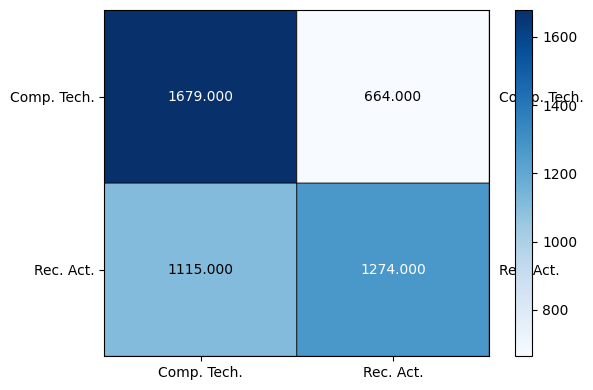

In [128]:
#plot_mat(contingency_matrix(y_train,kmeans.labels_), size=(6,4))
plot_mat(contingency_matrix(y_train,kmeans.labels_),size=(6,4),xticklabels = ['Comp. Tech.','Rec. Act.'],yticklabels = ['Comp. Tech.','Rec. Act.'])


Question #3

In [129]:
print("Homogeneity: ", homogeneity_score(y_train,kmeans.labels_))
print("Completeness: ", completeness_score(y_train,kmeans.labels_))
print("V-measure: ", v_measure_score(y_train,kmeans.labels_))
print("Adjusted Rand Index: ", adjusted_rand_score(y_train,kmeans.labels_))
print("Adjusted Mutual Information Score: ", adjusted_mutual_info_score(y_train,kmeans.labels_))

Homogeneity:  0.04718253534609986
Completeness:  0.048326363521856326
V-measure:  0.04774760010940645
Adjusted Rand Index:  0.06135785075647432
Adjusted Mutual Information Score:  0.04760061859290397


Question #4

In [130]:
from sklearn.decomposition import TruncatedSVD

num_comp = np.arange(1,1000,100)
exp_var = []
for k in num_comp:
  lsi = TruncatedSVD(n_components=k)
  lsi.fit_transform(train_data_feat) 
  exp_var.append(lsi.explained_variance_ratio_.sum())
exp_var = np.array(exp_var)

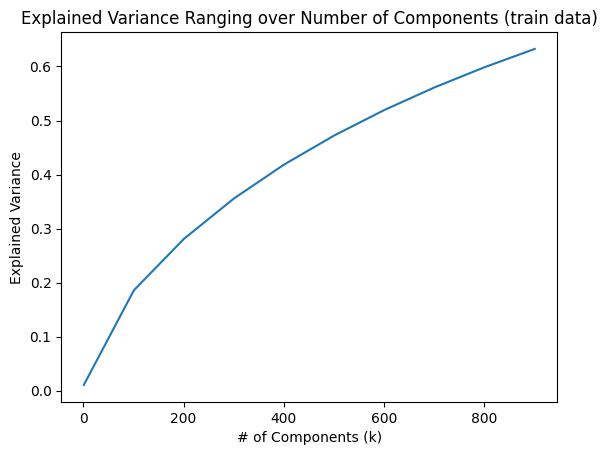

In [131]:
plt.plot(num_comp,exp_var)
plt.xlabel("# of Components (k)")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ranging over Number of Components (train data)")
plt.show()

Question #5

In [132]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 300]
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

for r in k:
  print("SVD component: ", r)
  svd = TruncatedSVD(n_components=r)
  svd_km = svd.fit_transform(train_data_feat)
  kmean_svd = kmeans.fit(svd_km)
  svd_hs.append(homogeneity_score(y_train, kmean_svd.labels_))
  svd_cs.append(completeness_score(y_train, kmean_svd.labels_))
  svd_vs.append(v_measure_score(y_train, kmean_svd.labels_))
  svd_ari.append(adjusted_rand_score(y_train, kmean_svd.labels_))
  svd_ms.append(adjusted_mutual_info_score(y_train, kmean_svd.labels_))    
  print("NMF component: ", r)
  nmf = NMF(n_components=r)
  nmf_km = nmf.fit_transform(train_data_feat)
  kmean_nmf = kmeans.fit(nmf_km)
  nmf_hs.append(homogeneity_score(y_train, kmean_nmf.labels_))
  nmf_cs.append(completeness_score(y_train, kmean_nmf.labels_))
  nmf_vs.append(v_measure_score(y_train, kmean_nmf.labels_))
  nmf_ari.append(adjusted_rand_score(y_train, kmean_nmf.labels_))
  nmf_ms.append(adjusted_mutual_info_score(y_train, kmean_nmf.labels_))



SVD component:  1
NMF component:  1
SVD component:  2
NMF component:  2
SVD component:  3
NMF component:  3


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  4
NMF component:  4
SVD component:  5
NMF component:  5
SVD component:  6
NMF component:  6
SVD component:  7
NMF component:  7
SVD component:  8
NMF component:  8
SVD component:  9
NMF component:  9
SVD component:  10
NMF component:  10
SVD component:  50
NMF component:  50
SVD component:  100
NMF component:  100


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  300
NMF component:  300


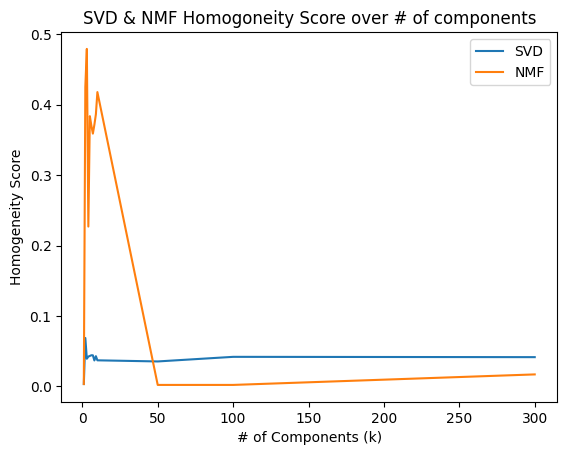

In [133]:
#Homogeneity
plt.plot(k,svd_hs, label = 'SVD')
plt.plot(k,nmf_hs, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("Homogeneity Score")
plt.title("SVD & NMF Homogoneity Score over # of components")
plt.legend()
plt.show()

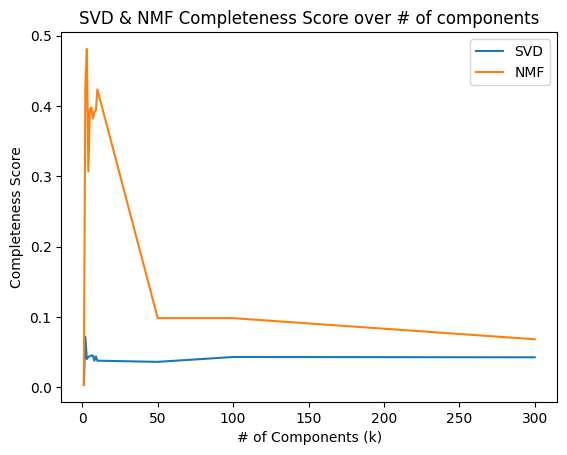

In [134]:
#Completeness
plt.plot(k,svd_cs, label = 'SVD')
plt.plot(k,nmf_cs, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("Completeness Score")
plt.title("SVD & NMF Completeness Score over # of components")
plt.legend()
plt.show()

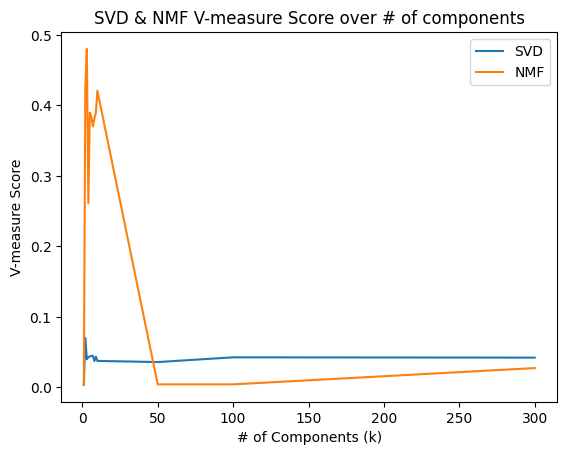

In [135]:
#V-measure score
plt.plot(k,svd_vs, label = 'SVD')
plt.plot(k,nmf_vs, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("V-measure Score")
plt.title("SVD & NMF V-measure Score over # of components")
plt.legend()
plt.show()

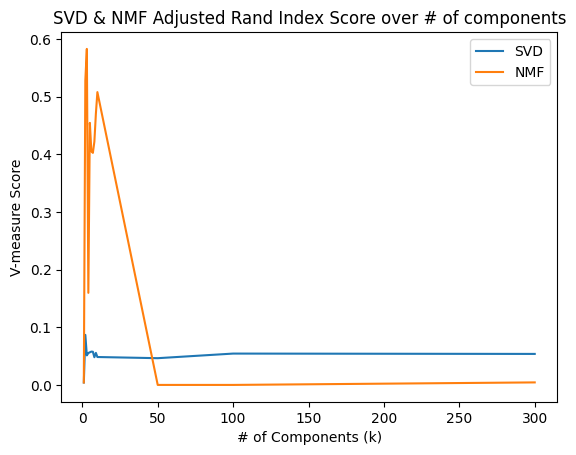

In [136]:
#Adjusted Rand Index score
plt.plot(k,svd_ari, label = 'SVD')
plt.plot(k,nmf_ari, label = 'NMF')
plt.xlabel("# of Components (k)")
plt.ylabel("V-measure Score")
plt.title("SVD & NMF Adjusted Rand Index Score over # of components")
plt.legend()
plt.show()

Question #8

In [137]:
best_svd = TruncatedSVD(n_components=50)
best_svd_km = best_svd.fit_transform(train_data_feat)
y_svd = kmeans.fit_predict(best_svd_km)
best_nmf = NMF(n_components=50)
best_nmf_km = best_nmf.fit_transform(train_data_feat)
best_nmf_svd = kmeans.fit_predict(best_nmf_km)

c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


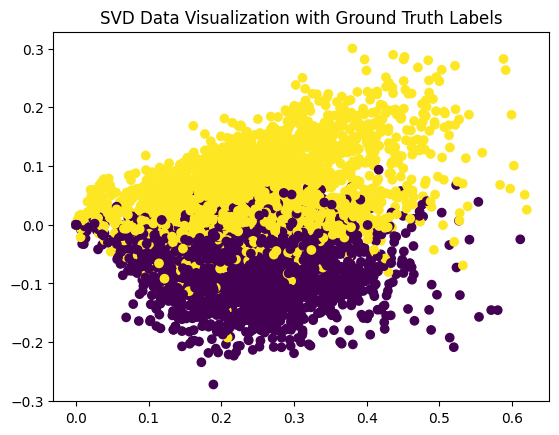

In [138]:
plt.scatter(best_svd_km[:,0],best_svd_km[:,1],c=y_train)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()

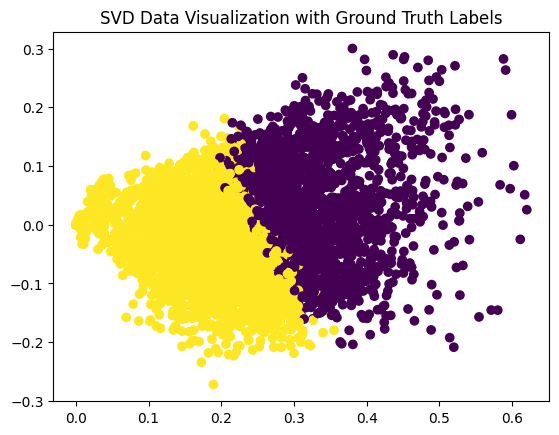

In [139]:
plt.scatter(best_svd_km[:,0],best_svd_km[:,1],c=y_svd)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()

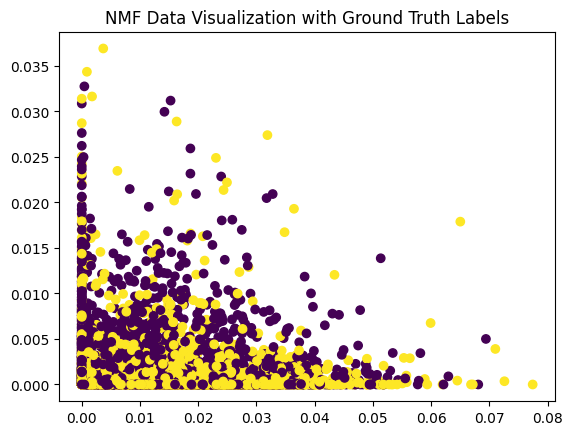

In [140]:
plt.scatter(best_nmf_km[:,0],best_nmf_km[:,1],c=y_train)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.show()

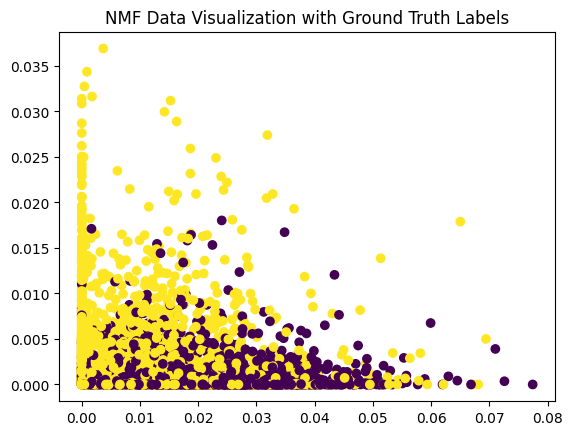

In [141]:
plt.scatter(best_nmf_km[:,0],best_nmf_km[:,1],c=y_svd)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.show()

Question #10

In [96]:
train_data = fetch_20newsgroups(categories = categories, remove=('headers','footers'))
vectorizer = CountVectorizer(min_df=3)
tfidf_transformer = TfidfTransformer()
train_data_feat_vec = vectorizer.fit_transform(train_data.data)
train_data_feat = tfidf_transformer.fit_transform(train_data_feat_vec)
kmeans = KMeans(n_clusters=20, max_iter = 5000, n_init = 30, random_state=0).fit(train_data_feat)

In [97]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 300]
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

for r in k:
  print("SVD component: ", r)
  svd = TruncatedSVD(n_components=r)
  svd_km = svd.fit_transform(train_data_feat)
  kmean_svd = kmeans.fit(svd_km)
  svd_hs.append(homogeneity_score(train_data.target, kmean_svd.labels_))
  svd_cs.append(completeness_score(train_data.target, kmean_svd.labels_))
  svd_vs.append(v_measure_score(train_data.target, kmean_svd.labels_))
  svd_ari.append(adjusted_rand_score(train_data.target, kmean_svd.labels_))
  svd_ms.append(adjusted_mutual_info_score(train_data.target, kmean_svd.labels_))    
  print("NMF component: ", r)
  nmf = NMF(n_components=r)
  nmf_km = nmf.fit_transform(train_data_feat)
  kmean_nmf = kmeans.fit(nmf_km)
  nmf_hs.append(homogeneity_score(train_data.target, kmean_nmf.labels_))
  nmf_cs.append(completeness_score(train_data.target, kmean_nmf.labels_))
  nmf_vs.append(v_measure_score(train_data.target, kmean_nmf.labels_))
  nmf_ari.append(adjusted_rand_score(train_data.target, kmean_nmf.labels_))
  nmf_ms.append(adjusted_mutual_info_score(train_data.target, kmean_nmf.labels_))

SVD component:  1
NMF component:  1
SVD component:  2
NMF component:  2
SVD component:  3
NMF component:  3


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  4
NMF component:  4
SVD component:  5
NMF component:  5
SVD component:  6
NMF component:  6
SVD component:  7
NMF component:  7
SVD component:  8
NMF component:  8
SVD component:  9
NMF component:  9
SVD component:  10
NMF component:  10
SVD component:  50
NMF component:  50


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  100
NMF component:  100


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


SVD component:  300
NMF component:  300


c:\Users\VenEn\anaconda3\envs\ECE219_Poject1\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [99]:
print('SVD Metrics')
print("SVD Homogeneity Scores: ", svd_hs )
print("SVD Completeness Scores: ", svd_cs)
print("SVD V-measure Scores: ", svd_vs)
print("SVD Adjusted Rand Index Scores: ", svd_ari)
print("SVD Adjusted Mutual Information Scores: ", svd_ms)

SVD Metrics
SVD Homogeneity Scores:  [0.01871851702044824, 0.24086232335198907, 0.2695521804982125, 0.3133388152900655, 0.29807162530658726, 0.30794930163997053, 0.29328119665190555, 0.3002566869058252, 0.3069888739841227, 0.305785369630748, 0.3222387248426778, 0.3229008170163398, 0.3117579949393331]
SVD Completeness Scores:  [0.013887313228126552, 0.17148742656331617, 0.1906648428319212, 0.2216854944169062, 0.21511652371870407, 0.2223862674018437, 0.21012658351064104, 0.21690072124724605, 0.21991682722360004, 0.217342194811921, 0.253919613081903, 0.2543884981669753, 0.25356052426439696]
SVD V-measure Scores:  [0.01594499554510472, 0.20033895980864674, 0.22334734059946365, 0.25966173471867077, 0.24988937089417138, 0.2582655199403302, 0.24483600885341394, 0.25186100371941567, 0.25625845005961884, 0.25408740771565613, 0.28402863222216934, 0.284579158966738, 0.27966365139347776]
SVD Adjusted Rand Index Scores:  [0.002487965602655624, 0.07140042269229749, 0.08542110442967096, 0.10537423948

In [100]:
print('NMF Metrics')
print("NMF Homogeneity Scores: ", nmf_hs )
print("NMF Completeness Scores: ", nmf_cs)
print("NMF V-measure Scores: ", nmf_vs)
print("NMF Adjusted Rand Index Scores: ", nmf_ari)
print("NMF Adjusted Mutual Information Scores: ", nmf_ms)

NMF Metrics
NMF Homogeneity Scores:  [0.01871851702044824, 0.23025824852315355, 0.27046990926931785, 0.2967606788486583, 0.2839940424477373, 0.297839815403566, 0.29042558833102355, 0.27903921277552257, 0.3237444247058403, 0.30619777544175925, 0.24586068051466797, 0.09840411915358767, 0.09571574285756206]
NMF Completeness Scores:  [0.013887313228126552, 0.1646196411277537, 0.19148848397234772, 0.2155122194595455, 0.2046250273306395, 0.21556987899441046, 0.21088703309680598, 0.20095099618500517, 0.23804534265004068, 0.2253232234705929, 0.26747506648130603, 0.13529312912442543, 0.11605271157459798]
NMF V-measure Scores:  [0.01594499554510472, 0.1919835535592874, 0.22422743538735138, 0.24969328948773528, 0.23786336756756163, 0.2501132863942171, 0.24434649374708078, 0.2336431316103454, 0.274358334694703, 0.25960769159917596, 0.2562128285459758, 0.11393716697240415, 0.10490770713496901]
NMF Adjusted Rand Index Scores:  [0.002487965602655624, 0.07360806991099299, 0.08763777776332968, 0.099541

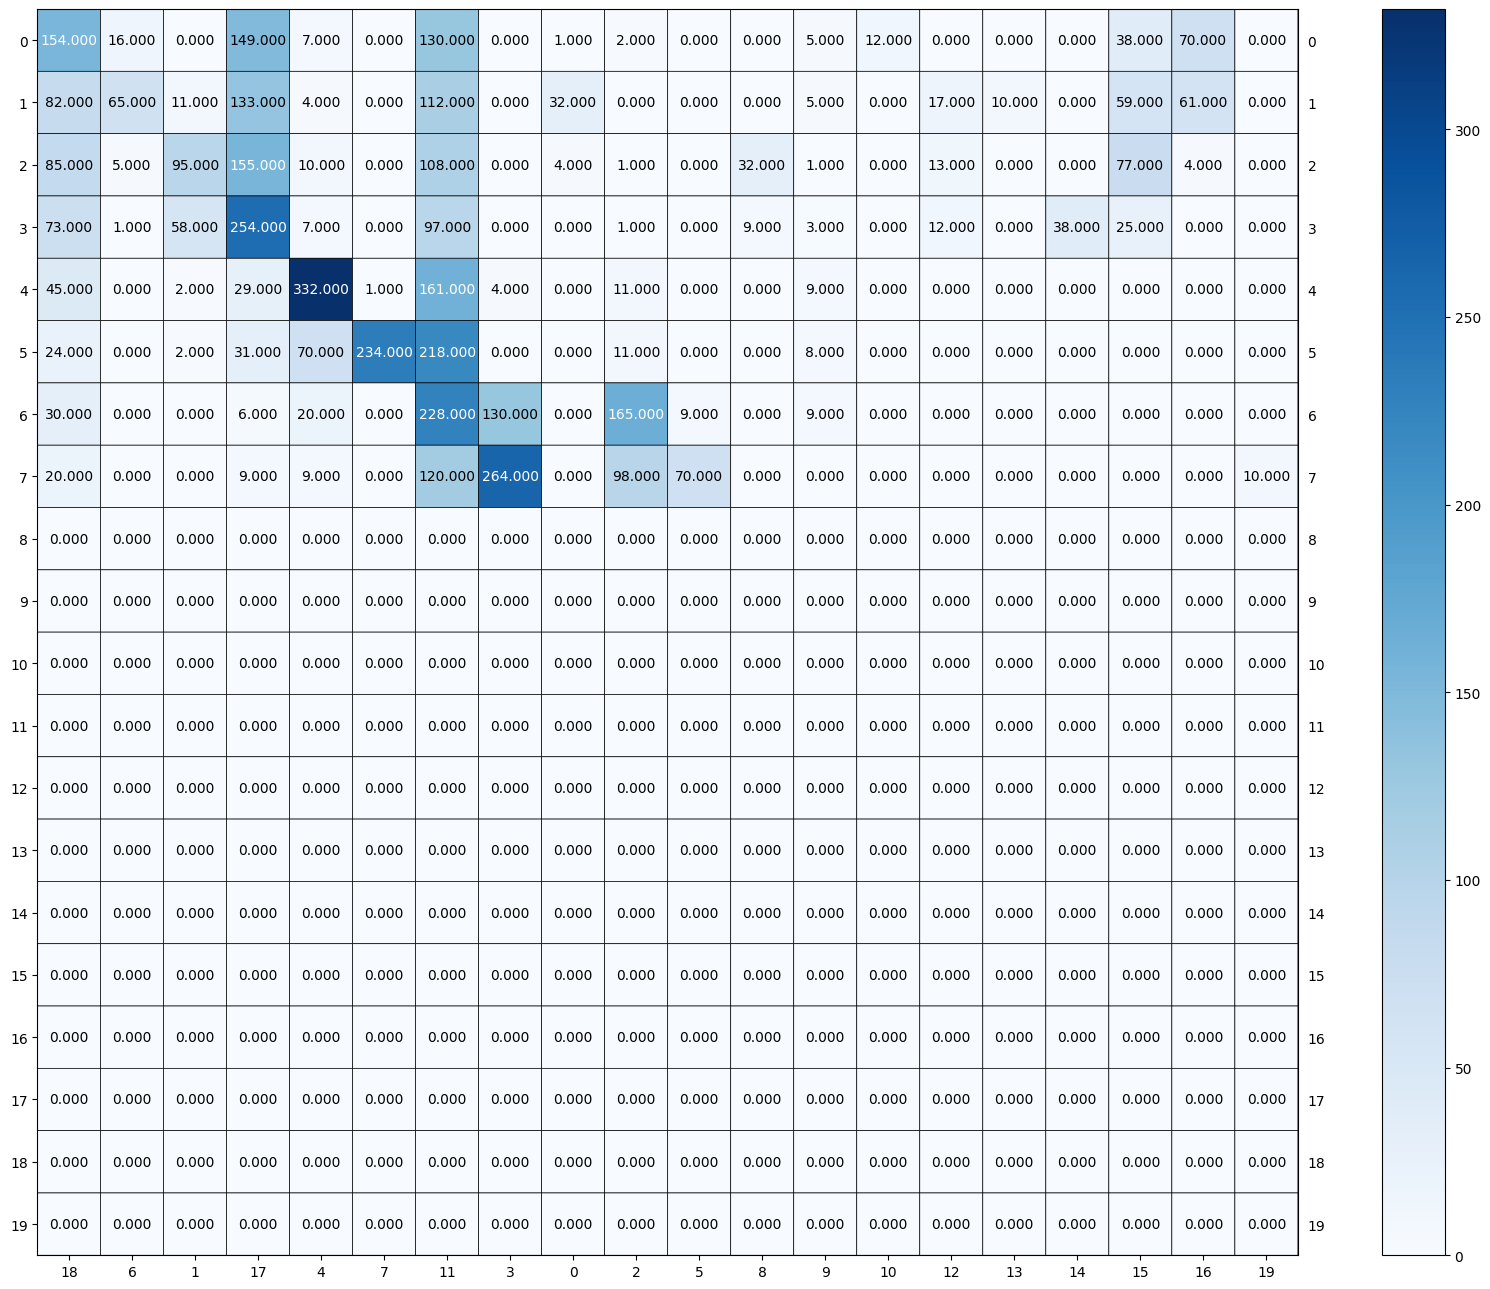

In [102]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

best_svd = TruncatedSVD(n_components=50, random_state=0)
best_svd_km = svd.fit_transform(train_data_feat)
kmean_svd = kmeans.fit(best_svd_km)
cm = confusion_matrix(train_data.target, kmeans.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13))

Question #11

In [104]:
!pip install umap-learn
import umap.umap_ as umap

In [106]:
n_components = [5, 20, 200]
umap_euc_hs = []
umap_euc_cs = []
umap_euc_vs = []
umap_euc_ari = []
umap_euc_ms = []
umap_cos_hs = []
umap_cos_cs = []
umap_cos_vs = []
umap_cos_ari = []
umap_cos_ms = []
for n in n_components:
    print("EUC component: ", n)
    euc_svd = umap.UMAP(n_components=n, metric='euclidean')
    euc_feat = euc_svd.fit_transform(train_data_feat)
    kmean_euc = kmeans.fit(euc_feat)
    umap_euc_hs.append(homogeneity_score(train_data.target, kmean_euc.labels_))
    umap_euc_cs.append(completeness_score(train_data.target, kmean_euc.labels_))
    umap_euc_vs.append(v_measure_score(train_data.target, kmean_euc.labels_))
    umap_euc_ari.append(adjusted_rand_score(train_data.target, kmean_euc.labels_))
    umap_euc_ms.append(adjusted_mutual_info_score(train_data.target, kmean_euc.labels_))    
    print("COS component: ", n)
    cos_svd = umap.UMAP(n_components=n, metric='cosine')
    cos_feat = euc_svd.fit_transform(train_data_feat)
    kmean_cos = kmeans.fit(cos_feat)
    umap_cos_hs.append(homogeneity_score(train_data.target, kmean_cos.labels_))
    umap_cos_cs.append(completeness_score(train_data.target, kmean_cos.labels_))
    umap_cos_vs.append(v_measure_score(train_data.target, kmean_cos.labels_))
    umap_cos_ari.append(adjusted_rand_score(train_data.target, kmean_cos.labels_))
    umap_cos_ms.append(adjusted_mutual_info_score(train_data.target, kmean_cos.labels_))


EUC component:  5
COS component:  5
EUC component:  20
COS component:  20
EUC component:  200
COS component:  200


In [107]:
print('UMAP-EUC Metrics')
print("UMAP-EUC Homogeneity Scores: ", umap_euc_hs)
print("UMAP-EUC Completeness Scores: ", umap_euc_cs)
print("UMAP-EUC V-measure Scores: ", umap_euc_vs)
print("UMAP-EUC Adjusted Rand Index Scores: ", umap_euc_ari)
print("UMAP-EUC Adjusted Mutual Information Scores: ", umap_euc_ms)

UMAP-EUC Metrics
UMAP-EUC Homogeneity Scores:  [0.030860029874391785, 0.031381679803032206, 0.03253865187992479]
UMAP-EUC Completeness Scores:  [0.023012738739422833, 0.02314920689930053, 0.024171777007850746]
UMAP-EUC V-measure Scores:  [0.026364852717372746, 0.02664401929033428, 0.027738003496114154]
UMAP-EUC Adjusted Rand Index Scores:  [0.004581001945500896, 0.004512542284022713, 0.004274511743803869]
UMAP-EUC Adjusted Mutual Information Scores:  [0.0205768938895296, 0.02091220862760575, 0.021960043905026417]


In [108]:
print('UMAP-COS Metrics')
print("UMAP-COS Homogeneity Scores: ", umap_cos_hs)
print("UMAP-COS Completeness Scores: ", umap_cos_cs)
print("UMAP-COS V-measure Scores: ", umap_cos_vs)
print("UMAP-COS Adjusted Rand Index Scores: ", umap_cos_ari)
print("UMAP-COS Adjusted Mutual Information Scores: ", umap_cos_ms)

UMAP-COS Metrics
UMAP-COS Homogeneity Scores:  [0.03608790786067704, 0.03460608237615037, 0.0332759741480989]
UMAP-COS Completeness Scores:  [0.027131931119533634, 0.025426785487246917, 0.024986165399266545]
UMAP-COS V-measure Scores:  [0.030975549641322507, 0.029314655935965023, 0.028541313461726916]
UMAP-COS Adjusted Rand Index Scores:  [0.004952260485255477, 0.0047014215411656, 0.004518937791606642]
UMAP-COS Adjusted Mutual Information Scores:  [0.025191961600949178, 0.023596614582288133, 0.0227033362798019]


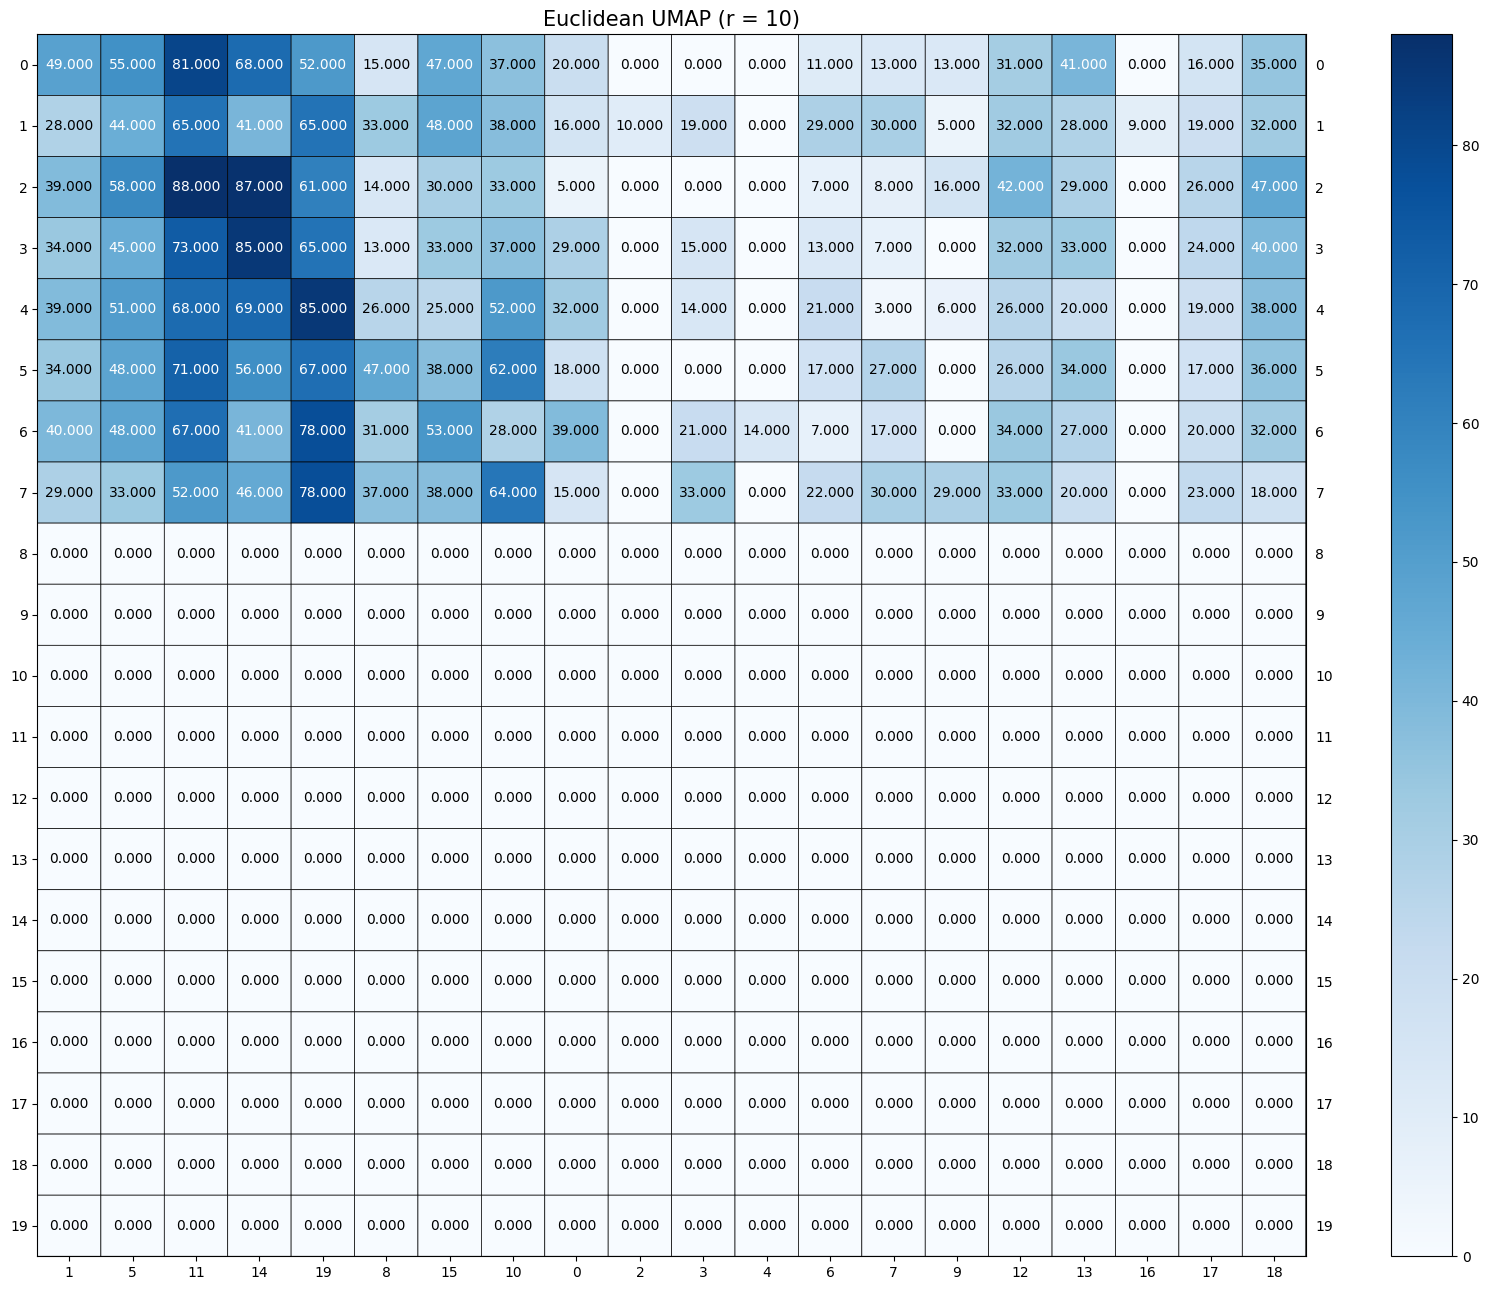

In [109]:
umap_euc = umap.UMAP(n_components=50, metric='euclidean')
euc_feat = euc_svd.fit_transform(train_data_feat)
kmean_euc = kmeans.fit(euc_feat)
cm = confusion_matrix(train_data.target, kmean_euc.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Euclidean UMAP (r = 10)', size=(15,13))

In [ ]:
Umap_cos = umap.UMAP(n_components=best_r_cos, metric='cosine').fit_transform(data_feat)
kmean_cos = km.fit(Umap_cos)
cm = confusion_matrix(dataset.target, kmean_cos.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Cosine UMAP (r = 50)', size=(15,13))